**Logistic Regression for MNIST Classification**



In [3]:
import numpy as np
import pandas as pd
import pprint
from sklearn.datasets import load_digits
from IPython.display import display, HTML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

# Standard scientific Python imports
import matplotlib.pyplot as plt

mnist = load_digits()
print(mnist.data.shape)

(1797, 64)


In [0]:
# split training : testing dataset = 0.75 : 0.25
trainData,testData,trainLabel,testLabel, trainImage, testImage = train_test_split(np.array(mnist.data),mnist.target, mnist.images, test_size=0.25,random_state=42)

In [5]:
# split valuate dataset from training dataset
trainData,valData,trainLabel,valLabel, trainImage, valImage = train_test_split(trainData,trainLabel, trainImage, test_size=0.1,random_state=84)

print("training data points: {}".format(len(trainLabel)))
print("validation data points: {}".format(len(valLabel)))
print("testing data points: {}".format(len(testLabel)))

training data points: 1212
validation data points: 135
testing data points: 450


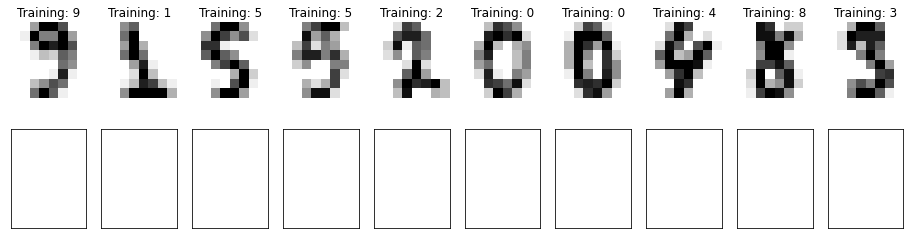

In [6]:
# plot training dataset -- 10 sample file image 
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(16, 4),
                        subplot_kw={'xticks': [], 'yticks': []})
images_and_labels = list(zip(trainImage, trainLabel))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:10]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
n_samples = len(mnist.images)

In [7]:
# build Logisitic Regression model 

model = LogisticRegression(random_state=0).fit(trainData, trainLabel)
    
# evaluate the model and update the accuracies list
score = model.score(valData, valLabel)
print("accuracy=%.2f%%" % (score * 100))

accuracy=97.04%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [8]:
# Predict Model

model = LogisticRegression(random_state=0).fit(testData, testLabel)
predictions = model.predict(testData)

print(classification_report(testLabel,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        46
           4       1.00      1.00      1.00        55
           5       1.00      1.00      1.00        59
           6       1.00      1.00      1.00        45
           7       1.00      1.00      1.00        41
           8       1.00      1.00      1.00        38
           9       1.00      1.00      1.00        48

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


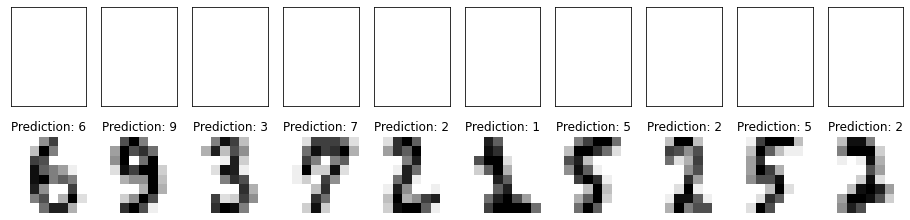

In [9]:
# plot test result 10 sample image file

fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(16, 4),
                        subplot_kw={'xticks': [], 'yticks': []})

images_and_predictions = list(zip(testImage, predictions))

for ax, (image, label) in zip(axes[1, :], images_and_predictions[:10]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % label)


Confusion matrix:
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 46  0  0  0  0  0  0]
 [ 0  0  0  0 55  0  0  0  0  0]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 41  0  0]
 [ 0  0  0  0  0  0  0  0 38  0]
 [ 0  0  0  0  0  0  0  0  0 48]]


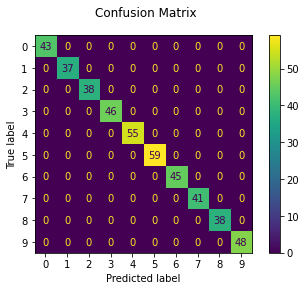

In [10]:
#print("Classification report for classifier %s:\n%s\n"
#      % (predictions, classification_report(testData, predictions)))

# print & plot Confusion matrix

disp = plot_confusion_matrix(model, testData, testLabel)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()